2024-11-06 00:02:49.709898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 00:02:49.883375: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 00:02:50.053333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 00:02:50.210111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 00:02:50.251672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 00:02:53.074141: W tensorflow/compiler/tf2tensorrt/utils/p

SVM Model Performance:
Accuracy: 0.7785234899328859
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       106
           1       0.92      0.26      0.40        43

    accuracy                           0.78       149
   macro avg       0.84      0.62      0.63       149
weighted avg       0.81      0.78      0.73       149

Confusion Matrix:
 [[105   1]
 [ 32  11]]


/home/kuki/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Neural Network Model Performance:
Accuracy: 0.8053691275167785
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       106
           1       0.75      0.49      0.59        43

    accuracy                           0.81       149
   macro avg       0.78      0.71      0.73       149
weighted avg       0.80      0.81      0.79       149

Confusion Matrix:
 [[99  7]
 [22 21]]


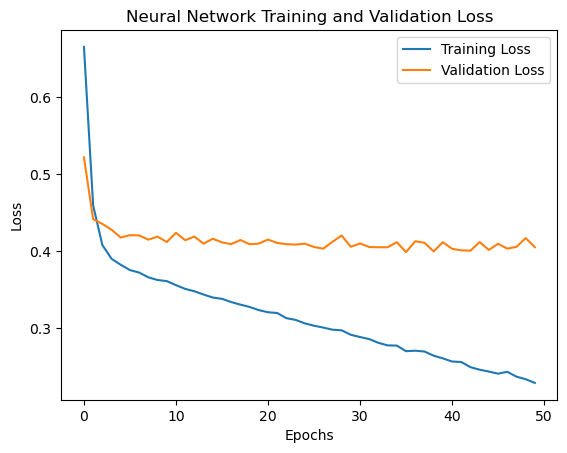

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# Step 1: Load and preprocess the dataset
data = pd.read_csv('antfile17.csv')
X = data.drop('bug', axis=1)  # Replace 'target_column' with the actual target column name
y = data['bug']               # Replace 'target_column' with the actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train and evaluate the SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# SVM Performance Metrics
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Step 3: Train and evaluate the Neural Network model
# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' if there are multiple classes
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Neural Network Performance Metrics
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")  # Adjust threshold if needed
print("\nNeural Network Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Step 4: Plot the loss graph for the neural network
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network Training and Validation Loss')
plt.legend()
plt.show()
